In [1]:
#import required libraries
import pandas as pd

# to plot graphs
import matplotlib.pyplot as plt 
from matplotlib import style
%matplotlib inline
import seaborn as sns

# to split data in training and testing
from sklearn.model_selection import train_test_split

# standard scaler to normalise the data
from sklearn.preprocessing import StandardScaler

# importing linear regression, decision tree regression and random forest regression 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# for checking results
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# for saving models
import pickle

In [2]:
# importing the dataset
car_data = pd.read_csv('car data.csv')

In [3]:
# first 5 rows of our data
car_data.head()


,Car_Name,Year,Selling_Price,New_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## handling missing data

In [4]:
car_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   New_Price      301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# this gives the sum of all null values in our data, as we can see there are no null values in our data
car_data.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
New_Price        0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

hence there are no missing values in the data, `no need of handling missing values`

In [6]:
# this stastical information about our data
car_data.describe()


,Year,Selling_Price,New_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### now next step is handelling categorical data, lets first see the variables in our data

In [7]:
car_data.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'New_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
# # there are 98 type of cars in our data.
print(car_data['Car_Name'].value_counts())

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64


### for such large range of objects we conclude that Car_Name is irrevelant to our analysis hence we drop it
### no pattern can be generated for such wide range of values


In [9]:
car_data.drop(['Car_Name'],axis = 1)

,Year,Selling_Price,New_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
# there are 3 possible values in Fuel_type variable 
print(car_data['Fuel_Type'].value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [11]:
# there are 2 possible values in Seller_type variable
print(car_data['Seller_Type'].value_counts())


Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [12]:
# there are 2 possible values in Transmission variable
print(car_data['Transmission'].value_counts())


Manual       261
Automatic     40
Name: Transmission, dtype: int64


### now we visualise the data, i.e. to find relationship between these variables and selling price

In [13]:
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']


<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

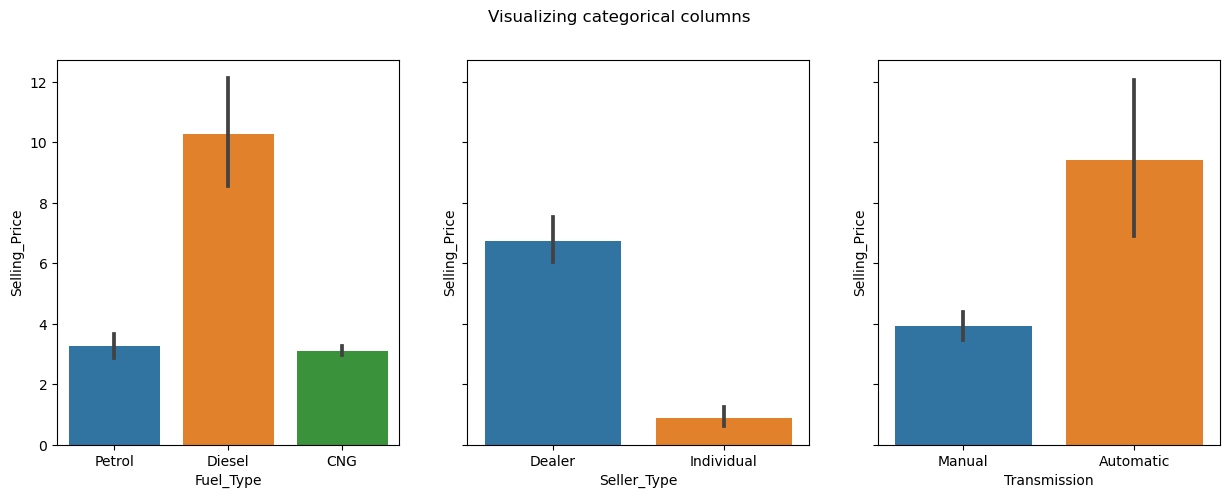

In [14]:
# plotting graph between selling price and fuel_type, seller_type, transmission_type respectively
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])


#### from the above graphs we conclude that the above three variables are revelant to our analysis

## encoding categorical data

In [15]:
# manual encoding
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

#one hot encoding
car_data = pd.get_dummies(car_data, columns=['Seller_Type', 'Transmission'], drop_first=True)


In [16]:
car_data.head()

,Car_Name,Year,Selling_Price,New_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


## Checking for correlation between cloumns

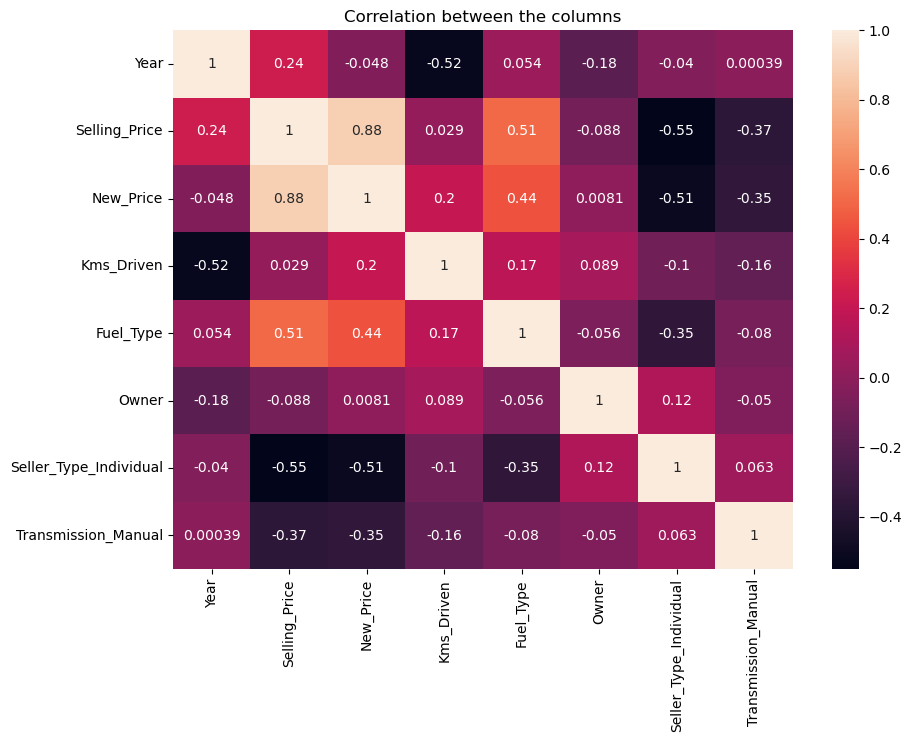

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()


### as we can see there are no variables that are highly correlated (> 90%)

## now we split the data into train and test set

In [18]:
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
y = car_data['Selling_Price']

print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)


Shape of X is:  (301, 7)
Shape of y is:  (301,)


In [19]:
# splitting the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)


X_test shape: (91, 7)
X_train shape: (210, 7)
y_test shape:  (91,)
y_train shape: (210,)


In [20]:
# now we normalise our data using standard scaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
# implementing Linear Regression Model
model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [22]:
# evaluating model: MAE MSE R2 for linear regression
print('Linear Regression:')
print("Mean Absolute Error: ", (metrics.mean_absolute_error(pred, y_test)))
print("Mean Squared Error: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

Linear Regression:
Mean Absolute Error:  1.2581404706473374
Mean Squared Error:  3.4932860262251473
R2 score:  0.8294933369778816


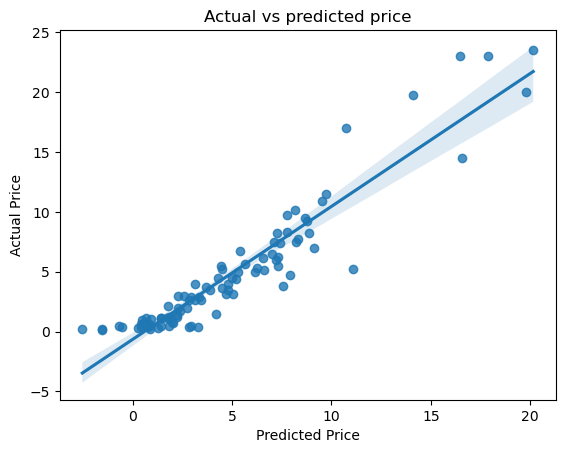

In [23]:
# lastly we draw the regression plot
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()


## Now lets implement polynomial regression

In [24]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
polynomialRegression = LinearRegression()
polynomialRegression.fit(X_poly , y_train)

LinearRegression()

In [25]:
y_pred_poly = polynomialRegression.predict(X_test_poly)

In [26]:
print('Polynomial Regression:')
print("Mean Absolute Error: ", (metrics.mean_absolute_error(y_pred_poly, y_test)))
print("Mean Squared Error: ", (metrics.mean_squared_error(y_pred_poly, y_test)))
print("R2 score: ", (metrics.r2_score(y_pred_poly, y_test)))

Polynomial Regression:
Mean Absolute Error:  0.8757172905219781
Mean Squared Error:  1.8301131081885034
R2 score:  0.9386259739027897


## Support Vector Regression

In [27]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'poly')
regressor.fit(X_train, y_train)
y_predictSVR = regressor.predict(X_test)

In [28]:
print('Support Vector Regression:')
print("Mean Absolute Error: ", (metrics.mean_absolute_error(y_predictSVR, y_test)))
print("Mean Squared Error: ", (metrics.mean_squared_error(y_predictSVR, y_test)))
print("R2 score: ", (metrics.r2_score(y_predictSVR, y_test)))

Support Vector Regression:
Mean Absolute Error:  1.335556319873117
Mean Squared Error:  5.635805195075858
R2 score:  0.7855545311982344


## Now lets implement Decision Tree Regression

In [29]:
DecisionTree = DecisionTreeRegressor(random_state = 0)
DecisionTree.fit(X_train, y_train)
y_dtpred = DecisionTree.predict(X_test)


In [30]:
# results
print('Decision Tree Regression:')
print("Mean Absolute Error: ", (metrics.mean_absolute_error(y_dtpred, y_test)))
print("Mean Squared Error: ", (metrics.mean_squared_error(y_dtpred, y_test)))
print("R2 score: ", (metrics.r2_score(y_dtpred, y_test)))


Decision Tree Regression:
Mean Absolute Error:  0.7323076923076924
Mean Squared Error:  1.5089692307692306
R2 score:  0.9404393781436885


## Now lets implement Random Forest Regression

In [31]:
randomForest = RandomForestRegressor(n_estimators = 100)
randomForest.fit(X_train, y_train)
y_pred = randomForest.predict(X_test)


In [32]:
# results
print('Random Forest Regression:')
print("Mean Absolute Error: ", (metrics.mean_absolute_error(y_pred, y_test)))
print("Mean Squared Error: ", (metrics.mean_squared_error(y_pred, y_test)))
print("R2 score: ", (metrics.r2_score(y_pred, y_test)))


Random Forest Regression:
Mean Absolute Error:  0.6632000000000001
Mean Squared Error:  1.2546036742857138
R2 score:  0.9499371468656461


# now we compare performance of different algorithms using r2 score, MAE and MSE

In [33]:
algorithms = [ 'Linear Regression', 'Polynomial Regression(deg=2)', 'Decision Tree Regression', 'Random Forest Regression']

r2_scores  = [(metrics.r2_score(pred, y_test)),
              (metrics.r2_score(y_pred_poly, y_test)),
              (metrics.r2_score(y_dtpred, y_test)),
              (metrics.r2_score(y_pred, y_test)) ]

mae=[(metrics.mean_absolute_error(pred, y_test)),
     (metrics.mean_absolute_error(y_pred_poly, y_test)),
     (metrics.mean_absolute_error(y_dtpred, y_test)),
     (metrics.mean_absolute_error(y_pred, y_test)) ]

mse= [(metrics.mean_squared_error(pred, y_test)), 
      (metrics.mean_squared_error(y_pred_poly, y_test)),
      (metrics.mean_squared_error(y_dtpred, y_test)),
      (metrics.mean_squared_error(y_pred, y_test))]


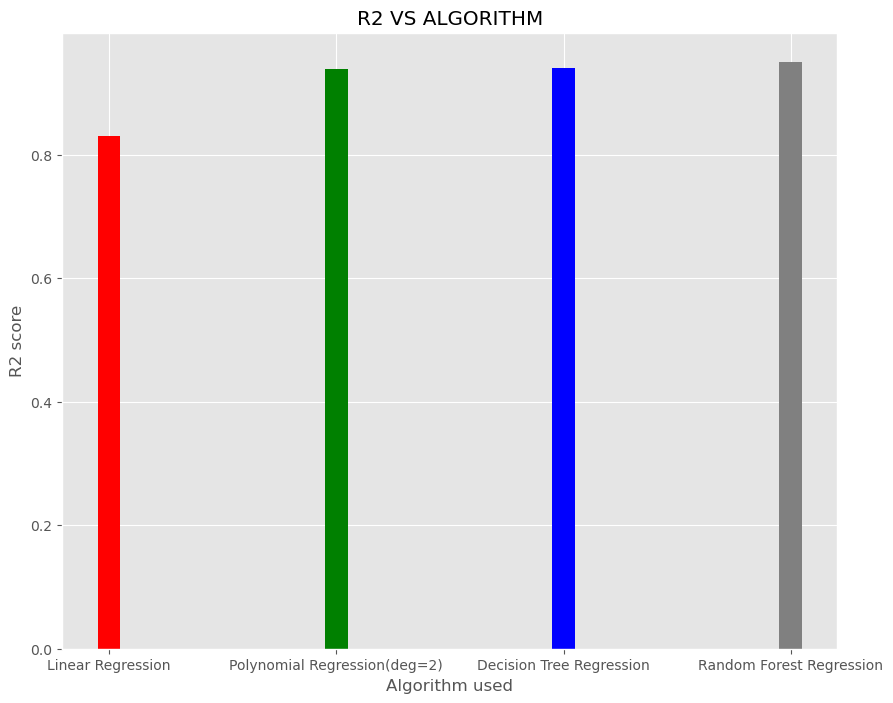

In [34]:
style.use('ggplot')
plt.figure(figsize=(10,8))
plt.bar(algorithms, r2_scores, color= ['r', 'g', 'b','grey'], width= 0.1)
plt.xlabel('Algorithm used')
plt.ylabel('R2 score')
plt.title('R2 VS ALGORITHM')
plt.show()


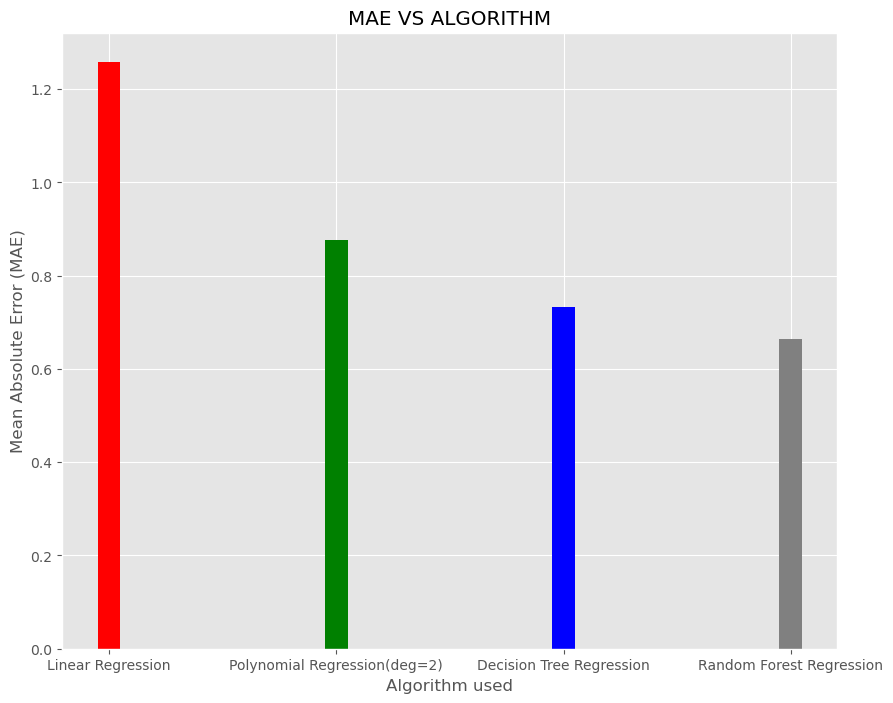

In [35]:
style.use('ggplot')
plt.figure(figsize=(10,8))
plt.bar(algorithms, mae, color= ['r', 'g', 'b','grey'], width= 0.1)
plt.xlabel('Algorithm used')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE VS ALGORITHM')
plt.show()


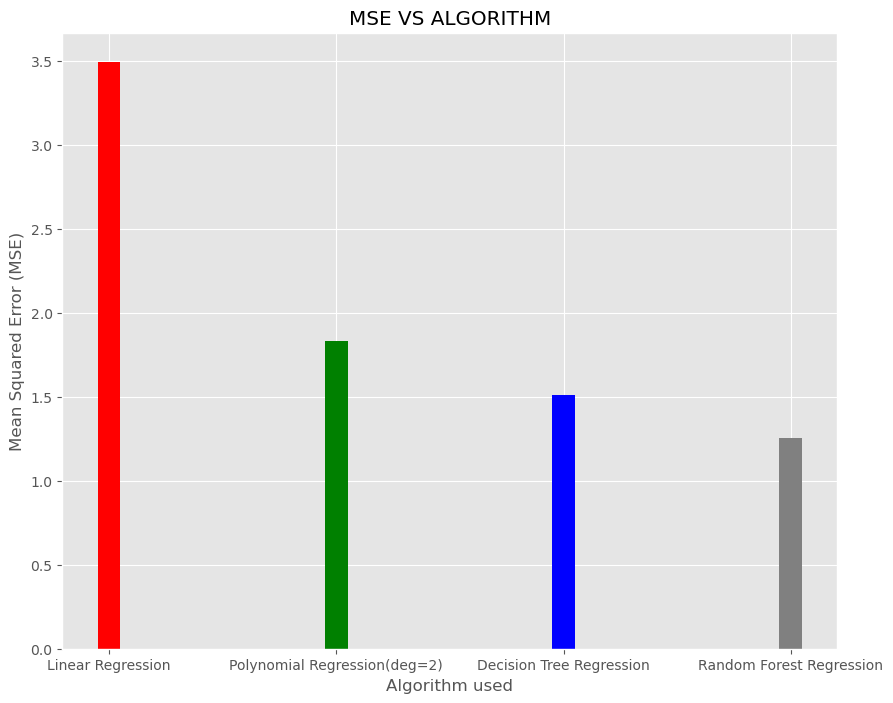

In [36]:
style.use('ggplot')
plt.figure(figsize=(10,8))
plt.bar(algorithms, mse, color= ['r', 'g', 'b','grey'], width= 0.1)
plt.xlabel('Algorithm used')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE VS ALGORITHM')
plt.show()


# hence we conclude that random forest regression is the best algorithm, decision tree regression the second best and linear regression performed the worst.

## Saving Models

In [37]:
filename = 'linearRegressionModel'
outfile = open(filename,'wb')

pickle.dump(model,outfile)
outfile.close()

In [38]:
filename = 'poly_reg'
outfile = open(filename,'wb')

pickle.dump(poly_reg,outfile)
outfile.close()

In [39]:
filename = 'polynomialRegression'
outfile = open(filename,'wb')

pickle.dump(polynomialRegression,outfile)
outfile.close()

In [40]:
filename = 'DecisionTreeRegressionModel'
outfile = open(filename,'wb')

pickle.dump(DecisionTree,outfile)
outfile.close()

In [41]:
filename = 'RandomForestRegressionModel'
outfile = open(filename,'wb')

pickle.dump(randomForest,outfile)
outfile.close()